# Import Package

In [445]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from imblearn.over_sampling import SMOTE 

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score, precision_score
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score

# Load Dataset

In [446]:
df = pd.read_csv('brain_stroke.csv')
df.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


# Data Understanding

In [447]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             4981 non-null   object 
 1   age                4981 non-null   float64
 2   hypertension       4981 non-null   int64  
 3   heart_disease      4981 non-null   int64  
 4   ever_married       4981 non-null   object 
 5   work_type          4981 non-null   object 
 6   Residence_type     4981 non-null   object 
 7   avg_glucose_level  4981 non-null   float64
 8   bmi                4981 non-null   float64
 9   smoking_status     4981 non-null   object 
 10  stroke             4981 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 428.2+ KB


# Data Cleaning

In [448]:
# Missing Value
df.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [449]:
# Check duplicated
df.duplicated().sum()

0

In [450]:
# Separate column names
cats = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
nums = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi', 'stroke']

# Standard EDA

## Statistical Summary of each column

In [451]:
df[nums].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,43.419859,0.096165,0.055210,105.943562,28.498173,0.049789
std,22.662755,0.294848,0.228412,45.075373,6.790464,0.217531
min,0.080000,0.000000,0.000000,55.120000,14.000000,0.000000
25%,25.000000,0.000000,0.000000,77.230000,23.700000,0.000000
50%,45.000000,0.000000,0.000000,91.850000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,113.860000,32.600000,0.000000
max,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000


Catatan:
1. untuk value masing-masing kolom ada 4981 baris terisi
2. dari nilai mean dan mediannya normal semua distribusinya


In [452]:
df[cats].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


Catatan:
- Untuk banyaknya value yang terisi semua sama, ada 4.981  value di tiap kolom
- gender : memiliki 2 nilai unik, terbanyak Female dengan kemunculan 2.907 kali
- ever_married : memiliki 2 nilai unik, terbanyak 'Yes' dengan kemunculan 3.280 kali
- work_type : memiliki 4 nilai unik, terbanyak 'Private' dengan kemunculan 2.860 kali <br><br>
dan seterusnya ....

## Univariate Analysis

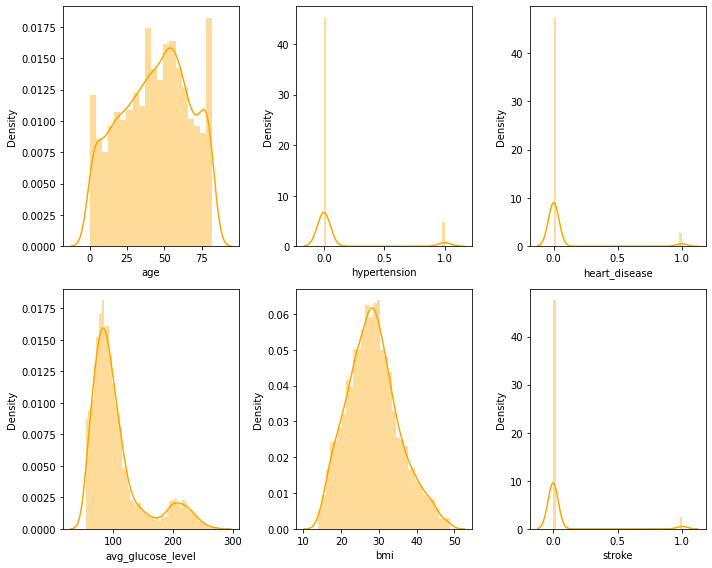

In [453]:
# Density plot (cek distribusi) 
plt.figure(figsize=(10,8))

feature = nums
for i in range(0, len (feature)):
  plt.subplot (2, len (feature) //2, i+1)
  sns.distplot (x=df[feature[i]], color='orange')
  plt.xlabel(feature[i])
  plt.tight_layout()


Catatan:
- age : usia terbanyak diangka 50 tahun
- hypertension : terbanyak diangka 0 yang berarti False, atau tidak memiliki hipertensi
- heart_disease : terbanyak diangka 0 yang berarti False, atau tidak memiliki penyakit jantung
- avg_glucosa_level : distribusi positif, rata-rata kadar glukosa dalam darah berada di sekitar 100
- bmi : indeks masa tubuh cukup skew
- stroke : terbanyak di angka 0 yang berarti False, atau tidak  mengalami stroke

## Multivariate Analysis

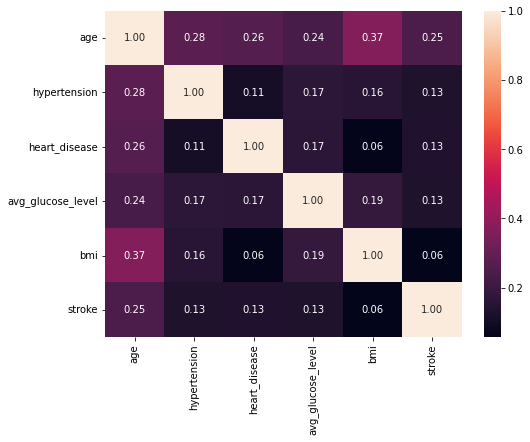

In [454]:
correlation = df.corr()
plt.figure(figsize=(8,6))
sns.heatmap(correlation, annot=True, fmt='.2f')

1. heart_disease, hypertension, bmi memiliki korelasi yang tinggi satu sama lain
2. Jika untuk permodelan memakai Linear regression, maka variabel tadi harus di drop

## Set Deep-dive Question

1. Tipe kerja seperti apa yang paling banyak terkena stroke?
2. Paling banyak warga bertempat tinggal di perkotaan atau  pedesaan yang terkena stroke?

## Answer Question

In [455]:
# 1. Tipe kerja seperti apa yang paling banyak terkena stroke?

# Filtering
a = df[(df['stroke'] == 1)]

In [456]:
answer_1 = (a
            .groupby('work_type')
           .agg(Total=('work_type', 'count'))
           .reset_index()
           .sort_values('Total', ascending=False))
answer_1

,work_type,Total
1,Private,148
2,Self-employed,65
0,Govt_job,33
3,children,2


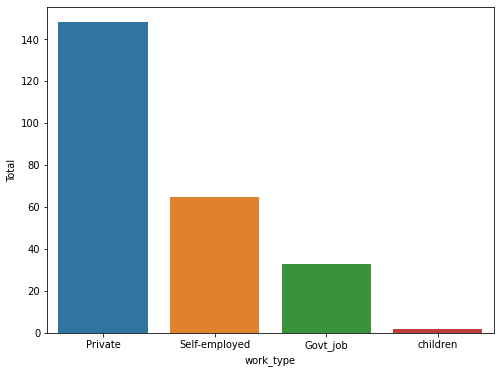

In [457]:
# visualize it
plt.figure(figsize=(8,6))
sns.barplot(data=answer_1, x='work_type', y='Total')
plt.show()

Answer =
Paling banyak work_type 'Private'

In [458]:
# 2. Paling banyak warga bertempat tinggal di perkotaan atau pedesaan yang terkena stroke?

answer_2 = (a
            .groupby('Residence_type')
           .agg(Total=('Residence_type', 'count'))
           .reset_index()
           .sort_values('Total', ascending=False))
answer_2

,Residence_type,Total
1,Urban,135
0,Rural,113


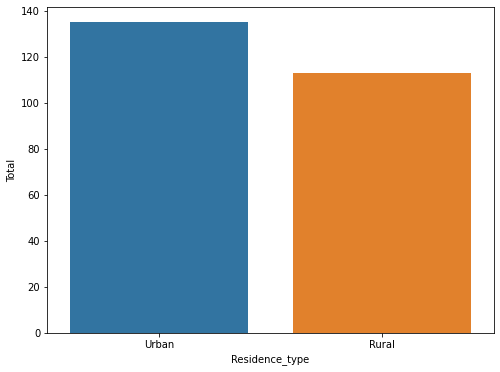

In [459]:
# visualize it
plt.figure(figsize=(8,6))
sns.barplot(data=answer_2, x='Residence_type', y='Total')
plt.show()

Answer =
Warga yang tinggal di Urban atau Perkotaan, lebih banyak yang terkena stroke

# Data Preprocessing

In [460]:
df[cats].describe()

,gender,ever_married,work_type,Residence_type,smoking_status
count,4981,4981,4981,4981,4981
unique,2,2,4,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2907,3280,2860,2532,1838


## Data Handling

In [461]:
# Label Encoding = 2 value
df['gender'] = [0 if x == 'Male' else (1) for x in df['gender']]
df['ever_married'] = [0 if x == 'No' else (1) for x in df['ever_married']]
df['Residence_type'] = [0 if x == 'rural' else (1) for x in df['Residence_type']]

In [462]:
df = pd.get_dummies(df, drop_first=True)

In [463]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   gender                          4981 non-null   int64  
 1   age                             4981 non-null   float64
 2   hypertension                    4981 non-null   int64  
 3   heart_disease                   4981 non-null   int64  
 4   ever_married                    4981 non-null   int64  
 5   Residence_type                  4981 non-null   int64  
 6   avg_glucose_level               4981 non-null   float64
 7   bmi                             4981 non-null   float64
 8   stroke                          4981 non-null   int64  
 9   work_type_Private               4981 non-null   uint8  
 10  work_type_Self-employed         4981 non-null   uint8  
 11  work_type_children              4981 non-null   uint8  
 12  smoking_status_formerly smoked  49

## Feature + target

In [464]:
# Feature and target
x = df.drop('stroke', axis=1)
y = df['stroke']

## Split data

In [465]:
# Split data
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

## Scalling

In [466]:
# Scalling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit_transform(x_train, y_train)
scaler.transform(x_test)

array([[ 1.        ,  0.58496094,  1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        , -0.73339844, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [-1.        , -0.96386719, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       ...,
       [ 1.        ,  0.14550781, -1.        , ..., -1.        ,
         1.        , -1.        ],
       [-1.        , -0.98046875, -1.        , ..., -1.        ,
        -1.        , -1.        ],
       [ 1.        ,  0.90234375, -1.        , ...,  1.        ,
        -1.        , -1.        ]])

# Modelling

## a. KNN

In [467]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

## b. Logistic Regression

In [468]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=42)
logreg.fit(x_train, y_train)
y_pred_reg = logreg.predict(x_test)

## c. Decission Tree

In [469]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

## d. Random Forest with Balanced Data

### - Split Data

In [470]:
# Feature and target
x = df.drop('stroke', axis=1)
y = df['stroke']

# Split Data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state=42)


### - Balanced Data

In [471]:
# Over Sampling Data

from imblearn.over_sampling import SMOTE

smt = SMOTE()

x_smt, y_smt = smt.fit_resample(x_train, y_train)

print (f'''Shape of x before SMOTE : {x.shape}
Shape of x after SMOTE : {x_smt.shape}''')

print('\nBalance of positive and negative classes (%):')
y_smt.value_counts(normalize=True) * 100

Shape of x before SMOTE : (4981, 14)
Shape of x after SMOTE : (6632, 14)

Balance of positive and negative classes (%):


0    50.0
1    50.0
Name: stroke, dtype: float64

In [472]:
y_smt.value_counts()

0    3316
1    3316
Name: stroke, dtype: int64

### - Scalling

In [473]:
# Scalling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(x_train, y_train)
scaler.transform(x_test)

array([[ 0.85391256,  0.93908164,  3.13465899, ..., -0.46191538,
        -0.76314327, -0.42343399],
       [ 0.85391256, -1.41917073, -0.31901397, ..., -0.46191538,
        -0.76314327, -0.42343399],
       [-1.17108009, -1.83142818, -0.31901397, ..., -0.46191538,
        -0.76314327, -0.42343399],
       ...,
       [ 0.85391256,  0.15299752, -0.31901397, ..., -0.46191538,
         1.31036994, -0.42343399],
       [-1.17108009, -1.86112469, -0.31901397, ..., -0.46191538,
        -0.76314327, -0.42343399],
       [ 0.85391256,  1.50680906, -0.31901397, ...,  2.16489868,
        -0.76314327, -0.42343399]])

### - Modelling dengan Random Forest

In [474]:
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train, y_train)
y_pred_bd = model.predict(x_test)

## e. AdaBoost Classifier

In [475]:
clf = AdaBoostClassifier(n_estimators=100)
clf.fit (x_train,y_train)
y_pred2 = clf.predict(x_test)

# Evaluation

In [476]:
print('Akurasi KNN',accuracy_score(y_test, y_pred_knn))
print('Akurasi Logistic Regression', accuracy_score(y_test, y_pred_reg))
print('Akurasi Decision Tree', accuracy_score(y_test, y_pred_dt))
print ('Akurasi Random Forest with Balanced Data: ', accuracy_score(y_test, y_pred_bd))
print ('Akurasi AdaBoost: ', accuracy_score(y_test, y_pred2))

Akurasi KNN 0.9471571906354515
Akurasi Logistic Regression 0.9478260869565217
Akurasi Decision Tree 0.9117056856187291
Akurasi Random Forest with Balanced Data:  0.945819397993311
Akurasi AdaBoost:  0.9464882943143813


Dari model diatas yang terbaik performa nya ialah Logistic Regression. karena tingkat akurasi nya terbesar diantara model lainnya. 0.9478 atau 95% artinya ketika kita memprediksi Stroke Otak 100 orang, mampu 95 orang dengan tepat dan 5 orang salah.